# K Nearest Neighbor

*Created by Meghana Bhimasani, June 5, 2020*

Sources: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761, https://medium.com/@zxr.nju/introduction-to-machine-learning-k-nearest-neighbors-ab8dedc740fe, https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com

KNN is a really simple and robust algorithm for classification (and sometimes regression). It has many benefits such as outlier insensitivity, ability to classify non-linear data, a high accuracy. But it does require a lot of memory :( 

<img src="img/knn-concept.png" width=60% height=60%/>

Because k can vary your results, the easiest technique for choosing a k value is to loop through a range k and calculate the score. Choose the lowest value of k where the score starts to stabilize.

**We can implement a KNN model by following the below steps:**

1. Load the data
2. Initialise the value of k
3. For getting the predicted class, iterate from 1 to total number of training data points (or less)
    1. Print accuracy and plot to view minimum k value where r squared score starts to stabilize

In [7]:
# Load Libraries

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import os

In [5]:
# View DataFrame

df = pd.read_csv(os.path.join("Resources", "diabetes.csv"))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Assign Target Variable

target = df["Outcome"]
target_names = ["negative", "positive"]

In [9]:
# Assign Features variable

data = df.drop("Outcome", axis=1)
feature_names = data.columns
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
# split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [11]:
X_train.shape

(576, 8)

In [12]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties

train_scores = []
test_scores = []

for k in range(1, 250, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.667
k: 3, Train/Test Score: 0.847/0.641
k: 5, Train/Test Score: 0.807/0.656
k: 7, Train/Test Score: 0.799/0.682
k: 9, Train/Test Score: 0.797/0.714
k: 11, Train/Test Score: 0.795/0.693
k: 13, Train/Test Score: 0.790/0.740
k: 15, Train/Test Score: 0.786/0.740
k: 17, Train/Test Score: 0.786/0.714
k: 19, Train/Test Score: 0.781/0.714
k: 21, Train/Test Score: 0.781/0.703
k: 23, Train/Test Score: 0.783/0.693
k: 25, Train/Test Score: 0.773/0.703
k: 27, Train/Test Score: 0.773/0.708
k: 29, Train/Test Score: 0.776/0.714
k: 31, Train/Test Score: 0.766/0.719
k: 33, Train/Test Score: 0.764/0.724
k: 35, Train/Test Score: 0.759/0.729
k: 37, Train/Test Score: 0.755/0.729
k: 39, Train/Test Score: 0.755/0.724
k: 41, Train/Test Score: 0.759/0.708
k: 43, Train/Test Score: 0.769/0.724
k: 45, Train/Test Score: 0.747/0.724
k: 47, Train/Test Score: 0.745/0.708
k: 49, Train/Test Score: 0.748/0.724
k: 51, Train/Test Score: 0.748/0.729
k: 53, Train/Test Score: 0.750/0.729
k: 55,

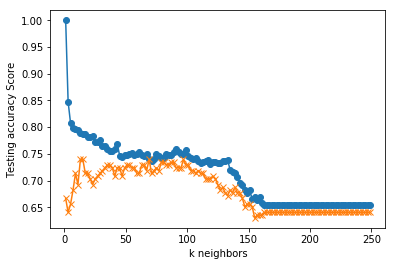

In [14]:
plt.plot(range(1, 250, 2), train_scores, marker='o')
plt.plot(range(1, 250, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

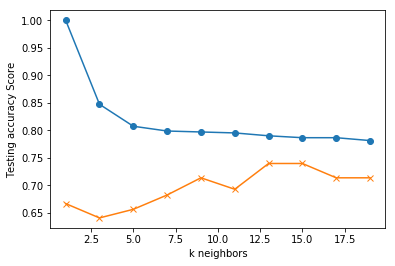

In [16]:
# zoom in on 1-20

plt.plot(range(1, 20, 2), train_scores[:10], marker='o')
plt.plot(range(1, 20, 2), test_scores[:10], marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [17]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.740


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = knn.predict(X_test)
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[101  22]
 [ 28  41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       123
           1       0.65      0.59      0.62        69

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192

Accuracy: 0.7395833333333334
